In [1]:
import numpy as np
#import tensorflow as tf
import math
import logging
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

# Regression Dataset

In [2]:
#Load in data set and give the columns relavent titles
mpg_df = pd.read_csv('Datasets/auto-mpg.csv', names=['mpg',
'cylinders',
'displacement',
'horse power',
'weight',
'acceleration',
'model year',
'origin',
'car name'], index_col=False)
mpg_df.head()

,mpg,cylinders,displacement,horse power,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
#remove Rows with NaN (there are only 6 rows and all of the NaNs are in the horse power column)
mpg_df['horse power'][25:36]
mpg_df = mpg_df.dropna()
#check rows have been removed (32 and 126 had NaN)
mpg_df[:][30:129]


,mpg,cylinders,displacement,horse power,weight,acceleration,model year,origin,car name
30,28.0,4,140.0,90.0,2264,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95.0,2228,14.0,71,3,toyota corona
33,19.0,6,232.0,100.0,2634,13.0,71,1,amc gremlin
34,16.0,6,225.0,105.0,3439,15.5,71,1,plymouth satellite custom
35,17.0,6,250.0,100.0,3329,15.5,71,1,chevrolet chevelle malibu
...,...,...,...,...,...,...,...,...,...
125,20.0,6,198.0,95.0,3102,16.5,74,1,plymouth duster
127,19.0,6,232.0,100.0,2901,16.0,74,1,amc hornet
128,15.0,6,250.0,100.0,3336,17.0,74,1,chevrolet nova
129,31.0,4,79.0,67.0,1950,19.0,74,3,datsun b210


## Get value counts for each of the columns
To help decide which features to use (depending on how spread out the data is)

In [4]:
mpg_df['mpg'].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 127, dtype: int64

In [5]:
mpg_df['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [6]:
mpg_df['displacement'].value_counts()

97.0     21
350.0    18
98.0     17
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: displacement, Length: 81, dtype: int64

In [7]:
mpg_df['horse power'].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: horse power, Length: 93, dtype: int64

In [8]:
mpg_df['weight'].value_counts()

1985    4
2130    4
2125    3
2720    3
2945    3
       ..
3102    1
3664    1
2807    1
2660    1
2625    1
Name: weight, Length: 346, dtype: int64

In [9]:
mpg_df['acceleration'].value_counts()

14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
11.1     1
12.1     1
21.9     1
22.1     1
11.6     1
Name: acceleration, Length: 95, dtype: int64

In [10]:
mpg_df['model year'].value_counts()

73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: model year, dtype: int64

In [11]:
mpg_df['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [12]:
mpg_df['car name'].value_counts()

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: car name, Length: 301, dtype: int64

## Graphs for looking at the features in more detail

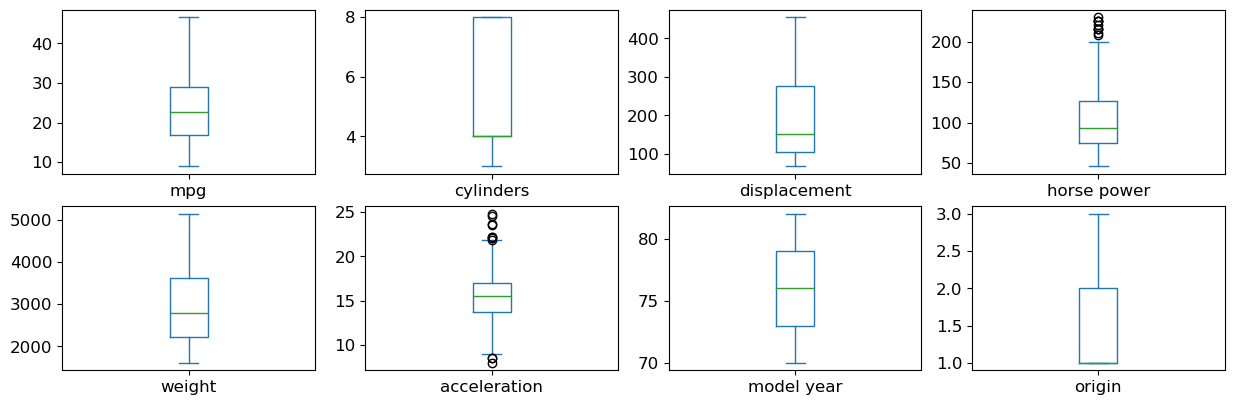

In [13]:
#graphs to see outliers and the spread of each of the features
data_mean = mpg_df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, fontsize=12, figsize=(15,20));

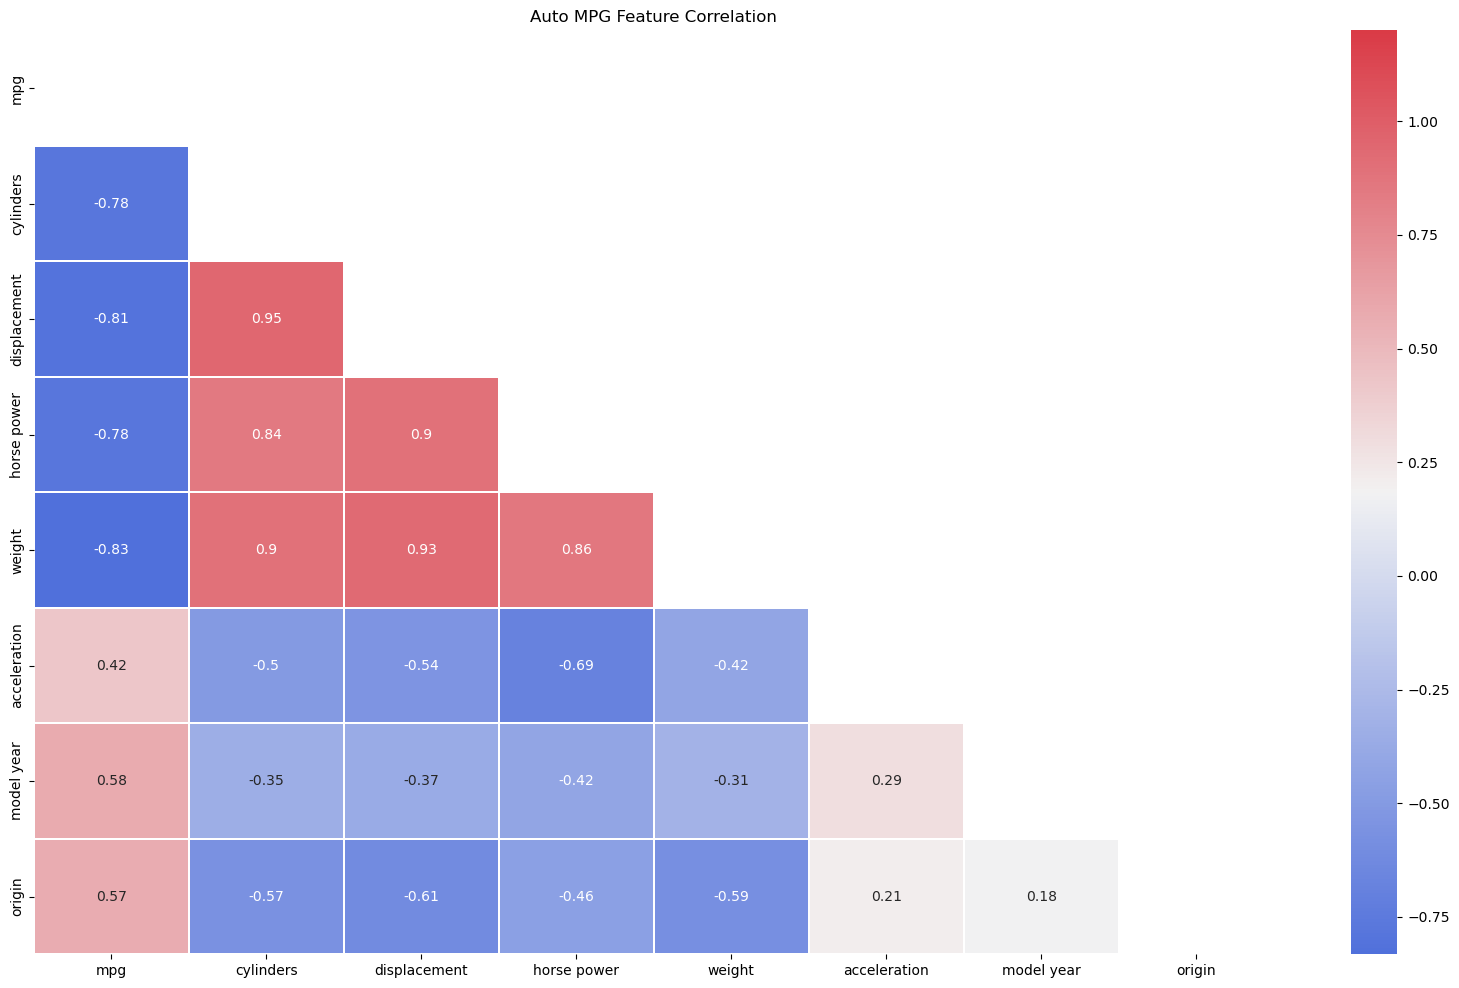

In [14]:
#graph showing the correlation between features to try to determine links between features

corrMatt = mpg_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Auto MPG Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1);

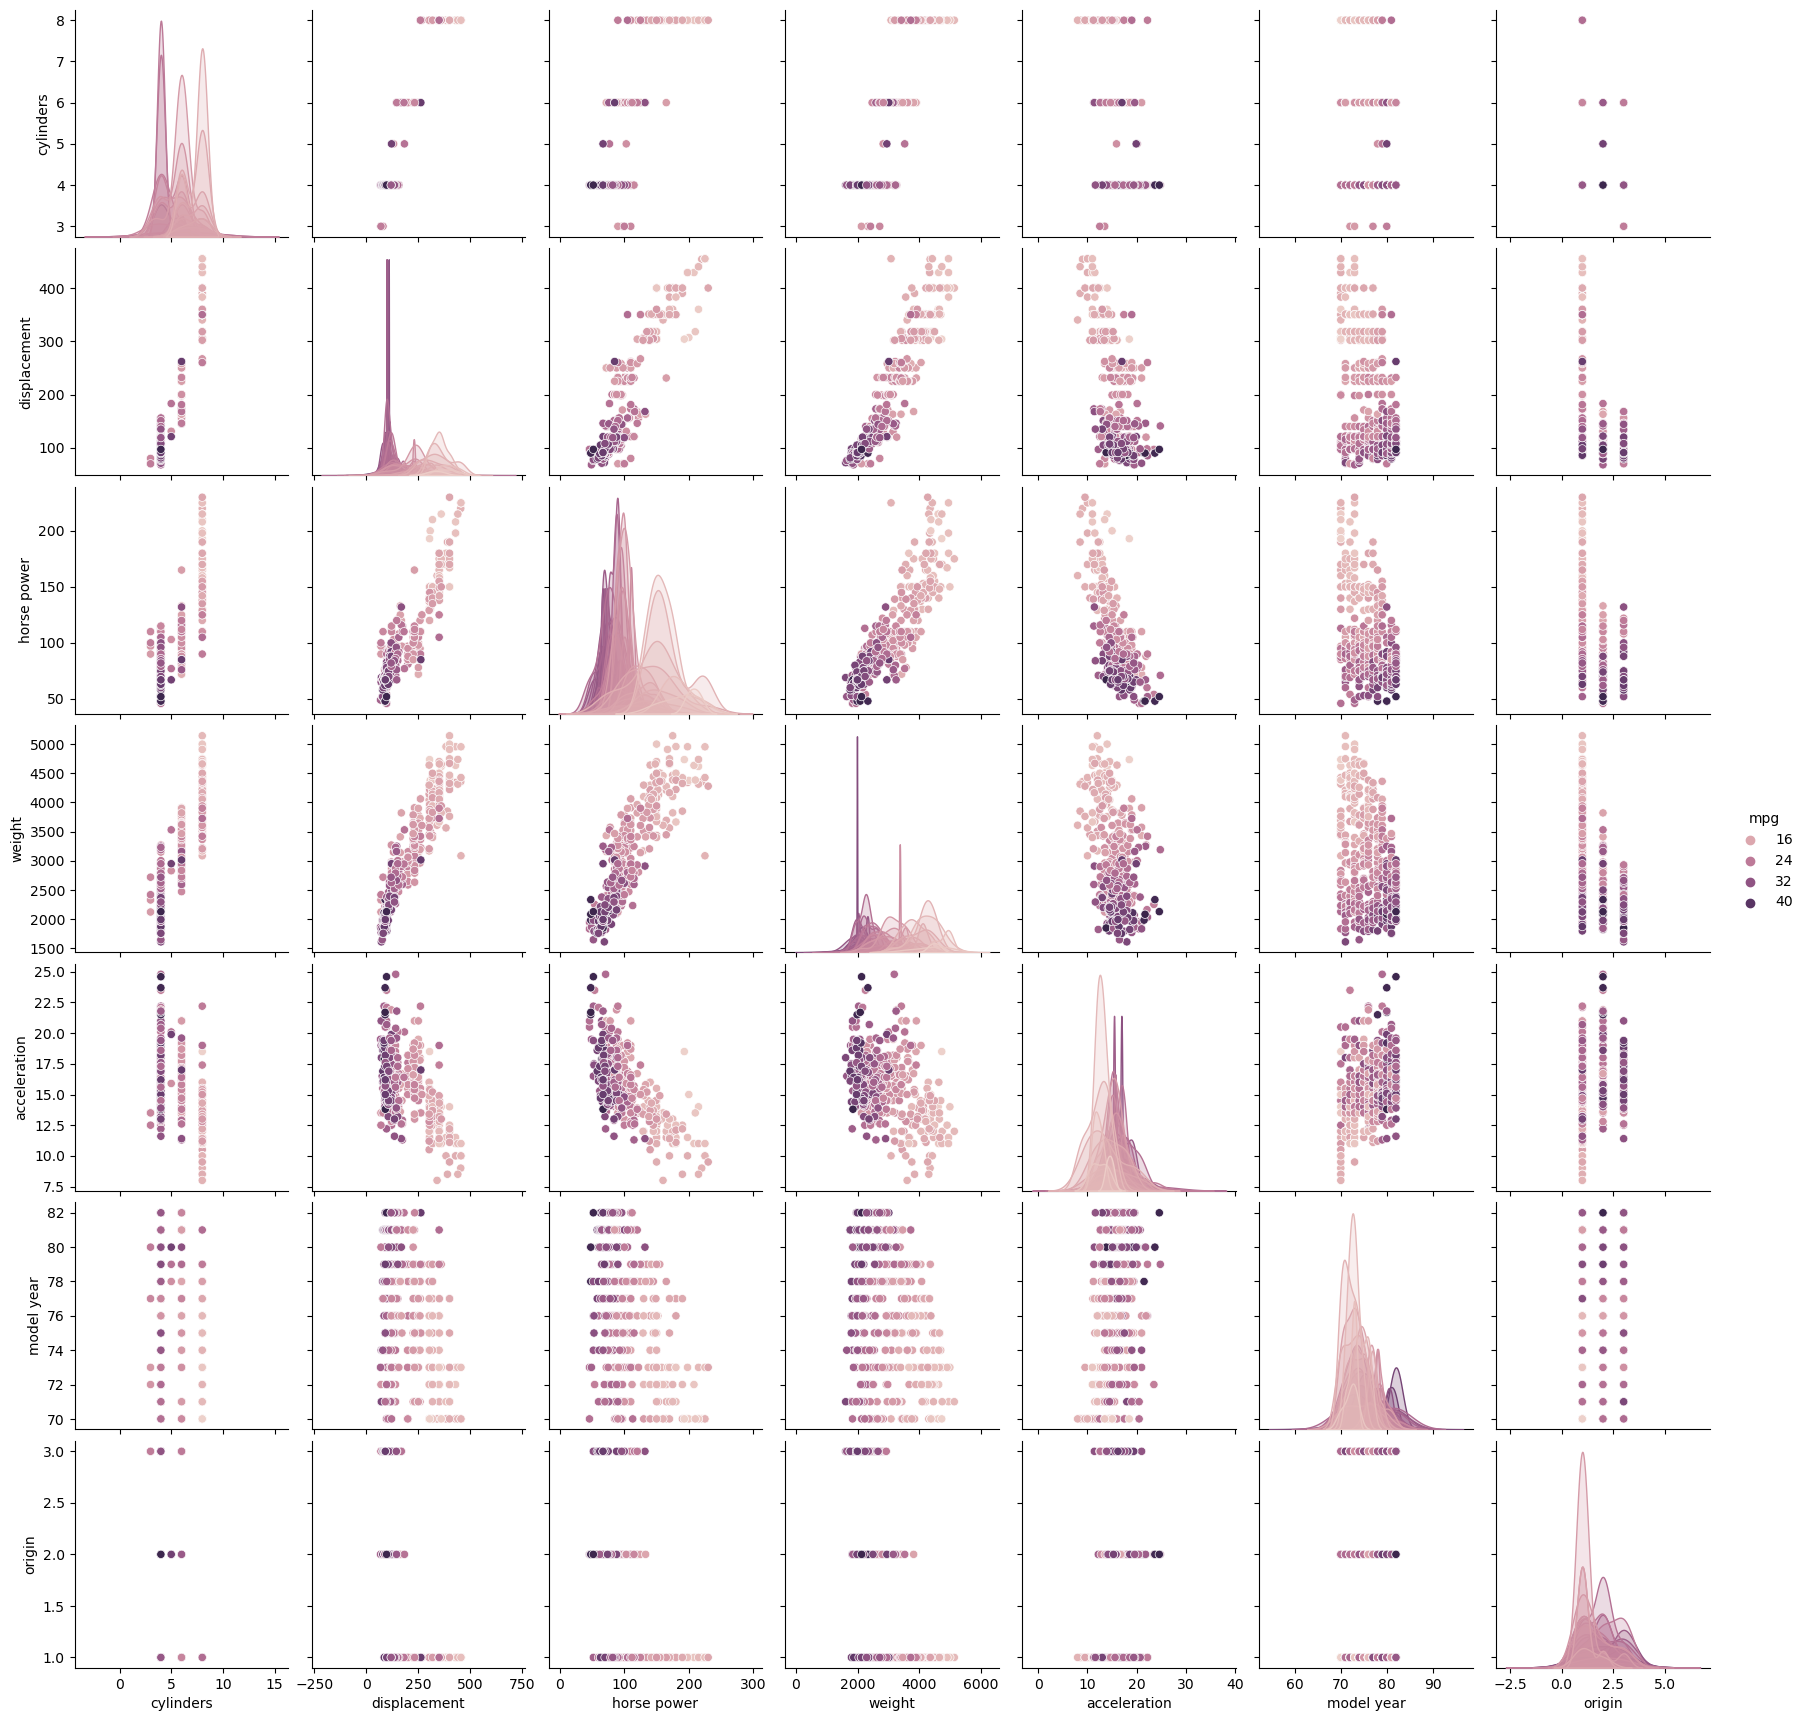

In [15]:
#more graphs to determine links (with mpg marked )
sns.pairplot(mpg_df[list(mpg_df.columns[1:]) + ['mpg']], hue="mpg");

In [16]:
# Assign features to X
#X = mpg_df.drop('mpg', axis=1)
mpg_df.head()
#X = mpg_df.drop('car name', axis=1)

#X.head()

,mpg,cylinders,displacement,horse power,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


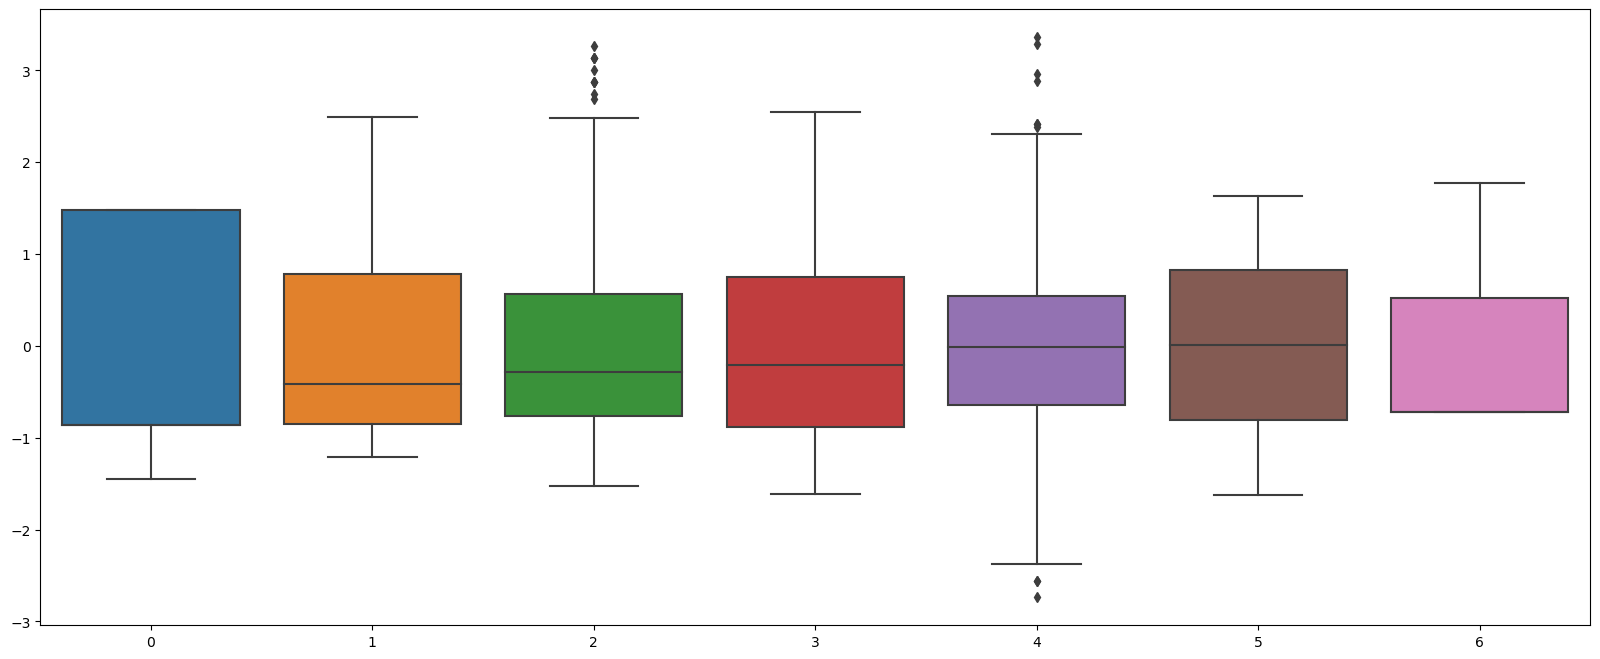

In [17]:
# Assign features to X
X = mpg_df.drop('mpg', axis=1)
X = X.drop('car name', axis=1)
X.head()
# Normalise the features to use zero mean normalisation
# only for the first 10 features, but try yourself to visualise more features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

In [18]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horse power   392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 38.7+ KB


In [19]:
#drop columns that have been decided not to be as useful (contain irrelavent features)
df = mpg_df.drop('car name', axis=1)
df = df.drop('origin', axis=1)
df = df.drop('model year', axis=1)
df = df.drop('acceleration', axis=1)
df.head()

,mpg,cylinders,displacement,horse power,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449


In [20]:
#from sklearn import tree
#X = [[0, 0], [2, 2]]
#y = [0.5, 2.5]
#clf = tree.DecisionTreeRegressor()
#clf = clf.fit(X, y)
#clf.predict([[1, 1]])


## Testing decision tree regression
Using a random distribution and sine wave to practice using decision tree regression

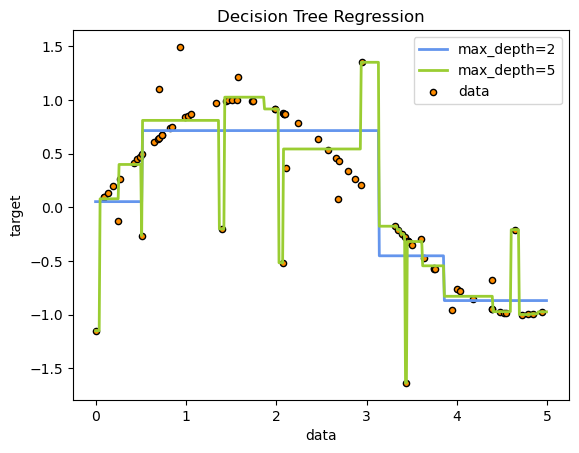

In [21]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Regression decision tree with displacement and mpg
Using a variation of max depths to get a mroe accurate result

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#select the features being used for the decision tree regression
X = df['displacement'].to_numpy()
y = df['mpg'].to_numpy()
X = X.reshape((-1, 1))
X.shape

(392, 1)

In [23]:
#splitting the data (70/30 training/test split)
Xs_train, Xs_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [24]:
#reshaping the data so it can be used in the model
x1 = np.array(Xs_train).reshape((-1,1))
y1 = np.array(y_train)
x_test = np.array(Xs_test).reshape((-1,1))
y_test = np.array(y_test)

In [25]:
#Fit regression model
#Trying multiple max depths
#To determine which is best (some may lead to overfitting)
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_3 = DecisionTreeRegressor(max_depth=3)
regr_4 = DecisionTreeRegressor(max_depth=4)
regr_5 = DecisionTreeRegressor(max_depth=5)
regr_10 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(x1, y1)
regr_2.fit(x1, y1)
regr_3.fit(x1, y1)
regr_4.fit(x1, y1)
regr_5.fit(x1, y1)
regr_10.fit(x1, y1)

DecisionTreeRegressor(max_depth=10)

In [26]:
# Predict
#                start. stop. step
X_test = np.arange(50.0, 500, 0.5)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)
y_5 = regr_5.predict(X_test)
y_10 = regr_10.predict(X_test)
#x_test.sort(axis=0)
#x_test

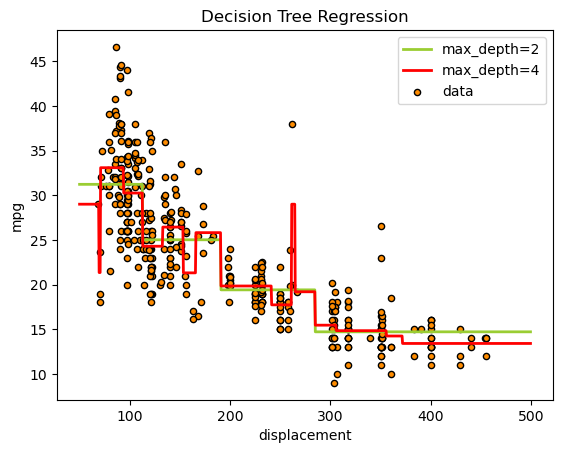

In [27]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
#plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_3, color="blue", label="max_depth=3", linewidth=2)
plt.plot(X_test, y_4, color="red", label="max_depth=4", linewidth=2)
#plt.plot(X_test, y_5, color="green", label="max_depth=5", linewidth=2)
#plt.plot(X_test, y_10, color="purple", label="max_depth=10", linewidth=2)
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


#test = regr_3.predict([[390]])
#test

In [28]:
from numpy import absolute

#define cross-validation method to use and thge k value
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#build model
#if leave max depth blank then the tree is created until all leaves are exuasted (which will more than likely lead
#to over fitting) therefore I have decided to use a max_depth of 5 
#this lowers the accuracy overall but reduces overfitting
model = DecisionTreeRegressor(max_depth=5).fit(x1, y1)

#use k-fold CV to evaluate model usign negative mean square error to evaluate
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error (make values non-negative)
mse = (absolute(scores))
mse

array([19.97815441, 23.0147174 , 21.65444558, 16.51090129, 15.05016463])

In [29]:
#show the accuracy of the model
model.score(x1, y1)


0.7679103433739535

In [30]:
#keys for scoring (I have chosen: negative mean square error)
sorted(sk.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [31]:
#copy dataframe to a new variable to do the rest of the ML model
autompg_ds = mpg_df

## Predicting model using linear regression

In [32]:
# Convert into testing and training data
# Decide features for model 
# weight, horsepower

from sklearn.model_selection import train_test_split

xs = autompg_ds["displacement"]
ys = autompg_ds["mpg"]

# Use training/testing set of 70/30
Xs_train, Xs_test, y_train, y_test = train_test_split(xs, ys, test_size=0.3, random_state=20)

In [33]:
# reshape the training and testing sets

x1 = np.array(Xs_train).reshape((-1,1))
y1 = np.array(y_train)
x_test = np.array(Xs_test).reshape((-1,1))
y_test = np.array(y_test)

In [34]:
# import linear regression from sklearn 
# Create linear regression model and fit it
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x1,y1)

LinearRegression()

In [35]:
# Test the score of the model with R2 (R-squared)

r_sq = linear_model.score(x1,y1)
print(f"Coefficient of determination: {r_sq}")
print(f"y intercept: {linear_model.intercept_}")
print(f"slope: {linear_model.coef_}")

Coefficient of determination: 0.6348619864390659
y intercept: 35.10609851853505
slope: [-0.06096617]


In [36]:
# Predict model by using an array of values that y-predict could be 
y_2 = linear_model.predict(x_test)
y_2

array([11.75605425, 29.68010912, 10.71962931, 28.70465035, 22.91286391,
       28.52175183, 29.92397381, 20.96194638, 29.61914295, 16.51141575,
       28.52175183,  7.36648979, 29.92397381, 21.38870959, 13.15827623,
       26.57083429, 24.68088293, 27.79015776, 26.20503726, 11.32929104,
        7.36648979, 15.7188555 , 19.86455526,  8.28098239, 15.7188555 ,
       28.52175183, 15.7188555 , 19.25489353, 28.582718  , 13.15827623,
       19.37682588, 27.72919158, 19.86455526, 30.28977085, 28.21692097,
       28.27788714, 21.38870959, 27.85112393, 29.19237974, 27.72919158,
       29.55817677, 13.76793796, 28.03402245, 30.83846641, 10.71962931,
       21.02291255, 29.13141356, 25.90020639, 28.21692097, 21.38870959,
       19.86455526, 13.76793796, 20.96194638, 27.66822541, 16.51141575,
       10.71962931, 30.1678385 , 28.03402245, 27.79015776, 16.51141575,
       22.91286391, 29.55817677,  8.95161029, 16.69431426, 24.86378145,
       28.52175183, 13.70697179, 21.02291255, 16.51141575, 13.76

In [37]:
# Cross validation score and KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Using cross validation with 5 folds
cv = KFold(n_splits=5, random_state=None, shuffle=False)
# Build the model using the same sets 
model = LinearRegression().fit(x1,y1)

number_of_folds = 5

# Using mean squared error as the scoring
score_cv = cross_val_score(model, x1, y1,scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
# Compute average mean squared error scores 
cv_error = np.average(absolute(score_cv))

print('Cross validation score across {}-folds are: {}'.format(cv.get_n_splits(), score_cv))
print('The {}-fold cross-validation average accuracy score for this classifier is {:.4f}'.format(number_of_folds, cv_error))

Cross validation score across 5-folds are: [-29.24638346 -12.79696513 -20.8995994  -20.96719475 -26.95039528]
The 5-fold cross-validation average accuracy score for this classifier is 22.1721


## Graph showing outputted regression line of the model

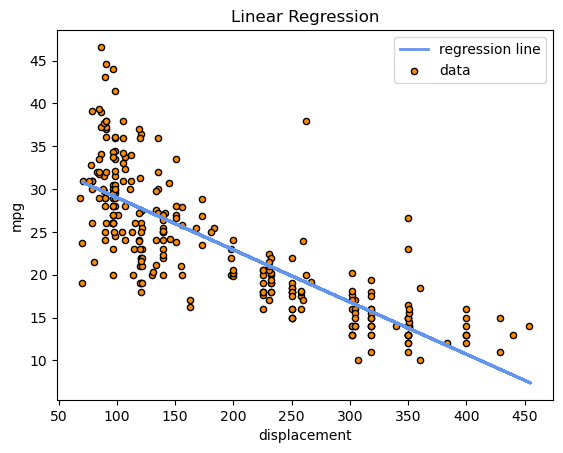

In [38]:
plt.figure()
plt.scatter(x1, y1, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_2, color="cornflowerblue", label="regression line", linewidth=2)
plt.xlabel("displacement")
plt.title("Linear Regression")
plt.ylabel("mpg")
plt.legend()
plt.show()

## SVM (Regression)

In [39]:
from sklearn import svm
from sklearn import metrics
# Define the model as linear using SVR to plot the regression line

clf = svm.SVR(kernel="linear", C=100, gamma='auto')

In [40]:
# Fit the model with the training sets
clf.fit(x1,y1)

SVR(C=100, gamma='auto', kernel='linear')

In [41]:
# Determine the overall accuracy of the model (R2)
svm_scoring = clf.score(x1, y1)
print('Overall accuracy of the model: {}'.format(svm_scoring))

Overall accuracy of the model: 0.6286809977370298


In [42]:
# Prediction values for y

y_pred = clf.predict(x_test)
y_pred

array([11.07563025, 29.11092437, 10.0327731 , 28.12941177, 22.30168067,
       27.94537815, 29.35630252, 20.33865546, 29.04957983, 15.86050421,
       27.94537815,  6.65882353, 29.35630252, 20.76806722, 12.48655463,
       25.98235294, 24.08067227, 27.20924369, 25.61428572, 10.64621848,
        6.65882353, 15.0630252 , 19.23445378,  7.5789916 , 15.0630252 ,
       27.94537815, 15.0630252 , 18.6210084 , 28.00672269, 12.48655463,
       18.74369748, 27.14789916, 19.23445378, 29.72436975, 27.63865546,
       27.7       , 20.76806722, 27.27058824, 28.62016807, 27.14789916,
       28.98823529, 13.1       , 27.45462185, 30.27647059, 10.0327731 ,
       20.4       , 28.55882353, 25.30756302, 27.63865546, 20.76806722,
       19.23445378, 13.1       , 20.33865546, 27.08655462, 15.86050421,
       10.0327731 , 29.60168067, 27.45462185, 27.20924369, 15.86050421,
       22.30168067, 28.98823529,  8.2537815 , 16.04453781, 24.26470588,
       27.94537815, 13.03865547, 20.4       , 15.86050421, 13.1 

In [43]:
# Cross validation score and K-fold
# Using cross validation with 5 folds
cv = KFold(n_splits=5, random_state=None, shuffle=False)

# Build the model using the same sets 
model = svm.SVR(kernel='linear').fit(x1,y1)

number_of_folds = 5

# Using mean squared error as the scoring
score_cv = cross_val_score(model, x1, y1,scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
# Compute average mean squared error scores 
cv_error = np.average(absolute(score_cv))

print('Cross validation score across {}-folds are: {}'.format(cv.get_n_splits(), score_cv))
print('The {}-fold cross-validation average accuracy score for this classifier is {:.4f}'.format(number_of_folds, cv_error))

Cross validation score across 5-folds are: [-29.57461216 -12.70322263 -20.44980722 -22.66143123 -27.19468326]
The 5-fold cross-validation average accuracy score for this classifier is 22.5168


## Support Vector Regression Line using linear kernals

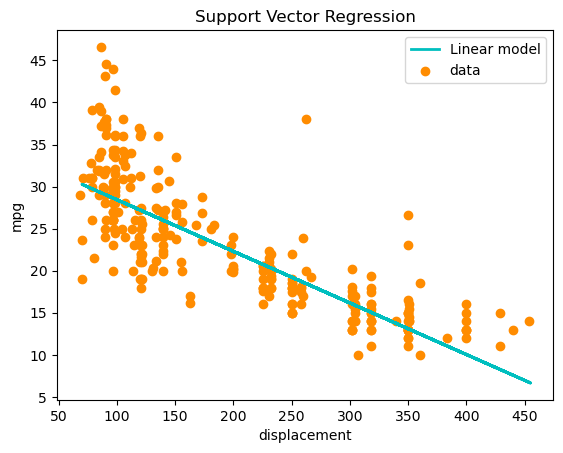

In [44]:
def plot_regression_line():
    
    lw = 2
    plt.scatter(x1, y1, color='darkorange', label='data')
    plt.plot(x_test, y_pred, color='c', lw=lw, label='Linear model')
    plt.xlabel('displacement')
    plt.ylabel('mpg')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
plot_regression_line()

# Multi-layer Perceptron (ANN)

In [45]:
from sklearn.neural_network import MLPRegressor
"""
Model:
Using lbfgs as an optimizer in the family of quasi-Newton methods.
linear activation function
4 hidden layers with 50 neurons each
"""

# train model
clf = MLPRegressor(solver='lbfgs',
                   activation="identity",
                   max_iter=700,
                   alpha=1e-5,
                   hidden_layer_sizes=(50, 4),
                   random_state=20)
clf.fit(x1,y1)

MLPRegressor(activation='identity', alpha=1e-05, hidden_layer_sizes=(50, 4),
             max_iter=700, random_state=20, solver='lbfgs')

In [46]:
# Determine the overall score for fit
score = clf.score(x1,y1)
print('Overall accuracy of the model: {}'.format(score))

Overall accuracy of the model: 0.634861986437856


In [47]:
# Predict next y-values 
y_3 = clf.predict(x_test)
y_3

array([11.75603894, 29.68011841, 10.71961257, 28.7046583 , 22.91286391,
       28.52175953, 29.92398344, 20.9619437 , 29.61915215, 16.51140696,
       28.52175953,  7.36646845, 29.92398344, 21.3887075 , 13.15826284,
       26.57083932, 24.68088536, 27.79016445, 26.20504178, 11.32927514,
        7.36646845, 15.71884562, 19.86455108,  8.2809623 , 15.71884562,
       28.52175953, 15.71884562, 19.25488851, 28.58272579, 13.15826284,
       19.37682103, 27.72919819, 19.86455108, 30.28978098, 28.21692825,
       28.2778945 , 21.3887075 , 27.85113071, 29.19238836, 27.72919819,
       29.5581859 , 13.76792541, 28.03402948, 30.83847729, 10.71961257,
       21.02290996, 29.1314221 , 25.90021049, 28.21692825, 21.3887075 ,
       19.86455108, 13.76792541, 20.9619437 , 27.66823194, 16.51140696,
       10.71961257, 30.16784846, 28.03402948, 27.79016445, 16.51140696,
       22.91286391, 29.5581859 ,  8.95159113, 16.69430573, 24.86378413,
       28.52175953, 13.70695915, 21.02290996, 16.51140696, 13.76

In [48]:
# Cross validation score and KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Using cross validation with 5 folds
cv = KFold(n_splits=5, random_state=None, shuffle=False)
# Build the model using the same sets 
model = MLPRegressor(solver='lbfgs',
                     max_iter=900,
                     activation="tanh",
                     alpha=1e-5,
                     hidden_layer_sizes=(50, 4),
                     random_state=20).fit(x1,y1)

number_of_folds = 5

# Using mean squared error as the scoring
score_cv = cross_val_score(model, x1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
# Compute average mean squared error scores 
cv_error = np.average(absolute(score_cv))

print('Cross validation score across {}-folds are: {}'.format(cv.get_n_splits(), score_cv))
print('The {}-fold cross-validation average accuracy score for this classifier is {:.4f}'.format(number_of_folds, cv_error))

Cross validation score across 5-folds are: [-25.6645135  -12.09503635 -17.85019164 -18.11344349 -28.91575153]
The 5-fold cross-validation average accuracy score for this classifier is 20.5278


## ANN Plot of regression Line

ValueError: x and y must have same first dimension, but have shapes (274, 1) and (118,)

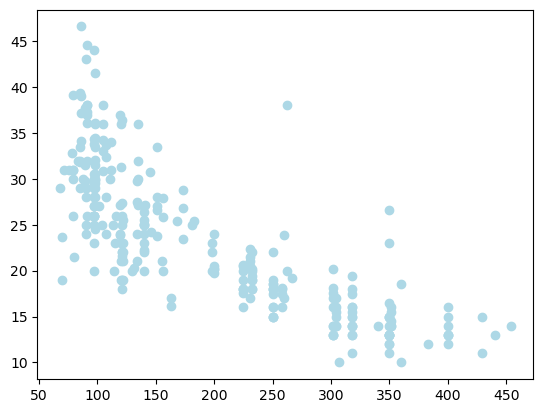

In [49]:
def plot_regression_line():
    
    lw = 2
    plt.scatter(x1, y1, color='lightblue', label='data')
    plt.plot(x1, y_3, color='m', lw=lw, label='Linear model')
    plt.xlabel('displacement')
    plt.ylabel('mpg')
    plt.title('ANN Regression Line')
    plt.legend()
    plt.show()
    
plot_regression_line()